In [2]:
# 6.6 Federal Reserve Economic Data

In [3]:
# This script contains the following:
# 1. Importing your libraries and data
# 2. Subsetting, wrangling, and cleaning time-series data
# 3. Time series analysis: decomposition
# 4. Testing for stationarity
# 5. Stationarizing the Federal Reserve Economic Data

In [4]:
# Importing libraries and data

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.


warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
%pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [7]:
quandl.ApiConfig.api_key = 'uAXPzaKkkdKttFfztSsA'

In [8]:
print("API key in use:", quandl.ApiConfig.api_key)

API key in use: uAXPzaKkkdKttFfztSsA


In [9]:
# (1) Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

# data = quandl.get('FRED/NROU') gave a 403 error. It was not possible to download this data, so I try with the data that I selected. 


In [10]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Advanced Analytics and Dashbord Design\World Happiness 2016-2024\02 Data'

In [11]:
# import df world happiness report. I call it whr to have a short name.
whr = pd.read_csv(os.path.join(path,'whr2.csv'))

In [12]:
# (2) Subsetting, wrangling and cleaning data 

In [13]:
whr.head(5)

,Generosity,Year,Overall rank,Freedom,Life expectancy,Happiness Score,Trust,GDP per capita,Family support,Country_numeric,clusters,cluster,Cluster
0,0.29678,2015,1.0,0.66557,0.94143,7.587,0.41978,1.39651,1.34951,142,0,pink,0
1,0.43630,2015,2.0,0.62877,0.94784,7.561,0.14145,1.30232,1.40223,60,4,black,4
2,0.34139,2015,3.0,0.64938,0.87464,7.527,0.48357,1.32548,1.36058,38,4,black,4
3,0.34699,2015,4.0,0.66973,0.88521,7.522,0.36503,1.45900,1.33095,108,0,pink,0
4,0.45811,2015,5.0,0.63297,0.90563,7.427,0.32957,1.32629,1.32261,25,4,black,4


In [14]:
whr.shape

(470, 13)

In [15]:
whr.columns

Index(['Generosity', 'Year', 'Overall rank', 'Freedom', 'Life expectancy',
       'Happiness Score', 'Trust', 'GDP per capita', 'Family support',
       'Country_numeric', 'clusters', 'cluster', 'Cluster'],
      dtype='object')

In [16]:
# Rename the columns 

whr.rename(columns = {'Happiness (Score)' : 'Happiness Score', 'Country or region': 'Country', 'Freedom to make life choices': 'Freedom', 'Trust (Gov.corruption)': 'Trust', 'Economy (GDP p. cap.)': 'GDP per capita' }, inplace = True)

In [17]:
whr.columns

Index(['Generosity', 'Year', 'Overall rank', 'Freedom', 'Life expectancy',
       'Happiness Score', 'Trust', 'GDP per capita', 'Family support',
       'Country_numeric', 'clusters', 'cluster', 'Cluster'],
      dtype='object')

In [18]:
type(whr)

pandas.core.frame.DataFrame

In [19]:
whr.loc[whr['clusters'] == 4, 'cluster'] = 'black' # Assign a color column to the clusters
whr.loc[whr['clusters'] == 3, 'cluster'] = 'dark purple'
whr.loc[whr['clusters'] == 2, 'cluster'] = 'purple'
whr.loc[whr['clusters'] == 1, 'cluster'] = 'light purple'
whr.loc[whr['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
# Freedom_mean"] = whr.groupby("cluster")["Freedom"].transform("mean")
whr['Freedom_mean'] = whr.groupby("cluster")['Freedom'].transform("mean")
whr['Freedom_median'] = whr.groupby("cluster")['Freedom'].transform("median")

whr['LifeExp_mean'] = whr.groupby("cluster")['Life expectancy'].transform("mean")
whr['LifeExp_median'] = whr.groupby("cluster")['Life expectancy'].transform("median")

whr['Happiness_mean'] = whr.groupby("cluster")['Happiness Score'].transform("mean")
whr['Happiness_median'] = whr.groupby("cluster")['Happiness Score'].transform("median")

whr['Trust_mean'] = whr.groupby("cluster")['Trust'].transform("mean")
whr['Trust_median'] = whr.groupby("cluster")['Trust'].transform("median")

whr['GDP per capita_mean'] = whr.groupby("cluster")['GDP per capita'].transform("mean")
whr['GDP per capita_median'] = whr.groupby("cluster")['GDP per capita'].transform("median")

whr['Generosity_mean'] = whr.groupby("cluster")['Generosity'].transform("mean")
whr['Generosity_median'] = whr.groupby("cluster")['Generosity'].transform("median")

whr['Overall rank_mean'] = whr.groupby("cluster")['Overall rank'].transform("mean")
whr['Overall rank_median'] = whr.groupby("cluster")['Overall rank'].transform("median")

whr['Family support_mean'] = whr.groupby("cluster")['Family support'].transform("mean")
whr['Family support_median'] = whr.groupby("cluster")['Family support'].transform("median")

In [21]:
whr.head(2)

,Generosity,Year,Overall rank,Freedom,Life expectancy,Happiness Score,Trust,GDP per capita,Family support,Country_numeric,...,Trust_mean,Trust_median,GDP per capita_mean,GDP per capita_median,Generosity_mean,Generosity_median,Overall rank_mean,Overall rank_median,Family support_mean,Family support_median
0,0.29678,2015,1.0,0.66557,0.94143,7.587,0.41978,1.39651,1.34951,142,...,0.192421,0.150873,1.248598,1.280754,0.270766,0.256165,37.324074,35.5,1.172294,1.184922
1,0.43630,2015,2.0,0.62877,0.94784,7.561,0.14145,1.30232,1.40223,60,...,0.181506,0.156314,1.200663,1.252785,0.243504,0.231503,27.013333,24.0,1.198759,1.223930


In [22]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pycountry

# Numeric ISO → Country Name
def get_country_name(code):
    try:
        return pycountry.countries.get(numeric=str(code).zfill(3)).name
    except:
        return None

whr['Country'] = whr['Country_numeric'].apply(get_country_name)


In [24]:
whr.head(2)

,Generosity,Year,Overall rank,Freedom,Life expectancy,Happiness Score,Trust,GDP per capita,Family support,Country_numeric,...,Trust_median,GDP per capita_mean,GDP per capita_median,Generosity_mean,Generosity_median,Overall rank_mean,Overall rank_median,Family support_mean,Family support_median,Country
0,0.29678,2015,1.0,0.66557,0.94143,7.587,0.41978,1.39651,1.34951,142,...,0.150873,1.248598,1.280754,0.270766,0.256165,37.324074,35.5,1.172294,1.184922,None
1,0.43630,2015,2.0,0.62877,0.94784,7.561,0.14145,1.30232,1.40223,60,...,0.156314,1.200663,1.252785,0.243504,0.231503,27.013333,24.0,1.198759,1.223930,Bermuda


In [25]:
# Round up to years
whr['Year'] = whr['Year'].round(0).astype(int)

In [26]:
# Show included countries
countries = whr["Country"].unique()
print(countries)

[None 'Bermuda' 'Burundi' 'Taiwan, Province of China' 'Belize' 'Algeria'
 'China' 'Belarus' 'Bangladesh' 'Antigua and Barbuda' 'Afghanistan' 'Chad'
 'Cayman Islands' 'Solomon Islands' 'Sri Lanka' 'Bosnia and Herzegovina'
 'American Samoa' 'Botswana' 'Myanmar' 'Cambodia' 'Australia'
 'Bouvet Island' 'Virgin Islands, British' 'Bahamas' 'Christmas Island'
 'Chile' 'Brazil' 'Albania' 'Brunei Darussalam' 'Cameroon' 'Cabo Verde'
 'Austria' 'Central African Republic' 'Barbados' 'Belgium' 'Antarctica'
 'Bhutan' 'Armenia' 'Angola' 'Andorra' 'Argentina' 'Azerbaijan' 'Canada'
 'Bahrain' 'British Indian Ocean Territory'
 'Bolivia, Plurinational State of' 'Bulgaria']


In [27]:
# Select countries to display to make the chart readable.
# List of countries to display
selected_countries = ['Taiwan', 'China', 'Argentina', 'Austria', 'Bosnia and Herzegovina', 'Belize']

# Filter the DataFrame
whr_selected = whr[whr['Country'].isin(selected_countries)]

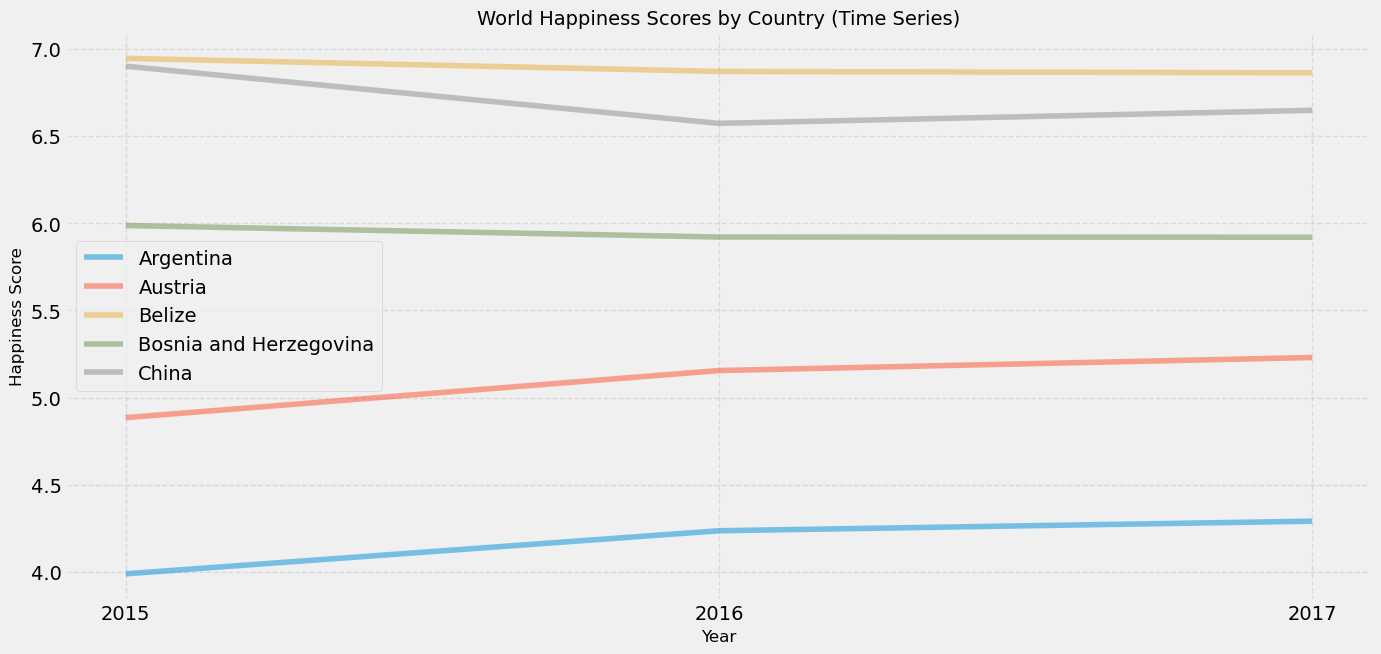

In [28]:
# Line chart time series
whr['Year'] = pd.to_numeric(whr['Year'], errors='coerce').astype(int)

plt.figure(figsize=(15,7), dpi=100)

# Plot each country's time series
for country, group in whr_selected.groupby("Country"):
    plt.plot(group["Year"], group["Happiness Score"], label=country, alpha=0.5)

# Formatting
plt.title("World Happiness Scores by Country (Time Series)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Force discrete x-axis ticks for years
plt.xticks(sorted(whr['Year'].unique()))

# Show legend
plt.legend()

# plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

In [29]:
# (3) Time series decomposition

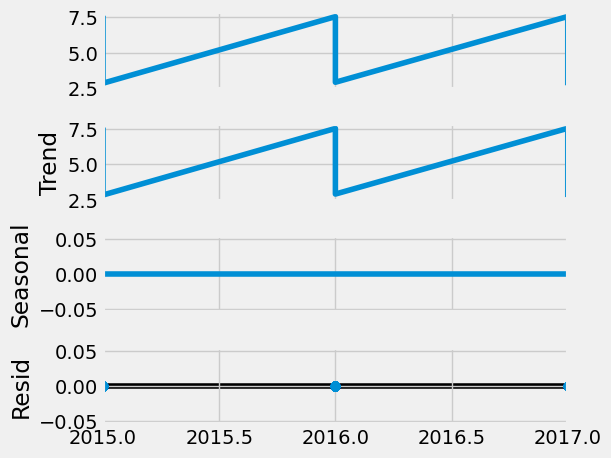

In [30]:
# Convert to numeric, coercing errors to NaN
whr["Happiness Score"] = pd.to_numeric(whr["Happiness Score"], errors='coerce')

# Drop non-numeric values (NaNs)
whr_clean = whr.dropna(subset=["Happiness Score"])

# Create time series
whr_series = pd.Series(whr_clean["Happiness Score"].values, index=whr_clean["Year"])

# Decompose using additive model
decomposition = sm.tsa.seasonal_decompose(whr_series, model='additive', period=1)
decomposition.plot()

from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7 # Set fixed size



In [31]:
# (4) Testing for stationarity

In [32]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(whr_clean['Happiness Score'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.820146
p-value                          0.055453
Number of Lags Used              0.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
Critical Value (5%)             -2.867722
Critical Value (10%)            -2.570063
dtype: float64


<Figure size 1000x400 with 0 Axes>

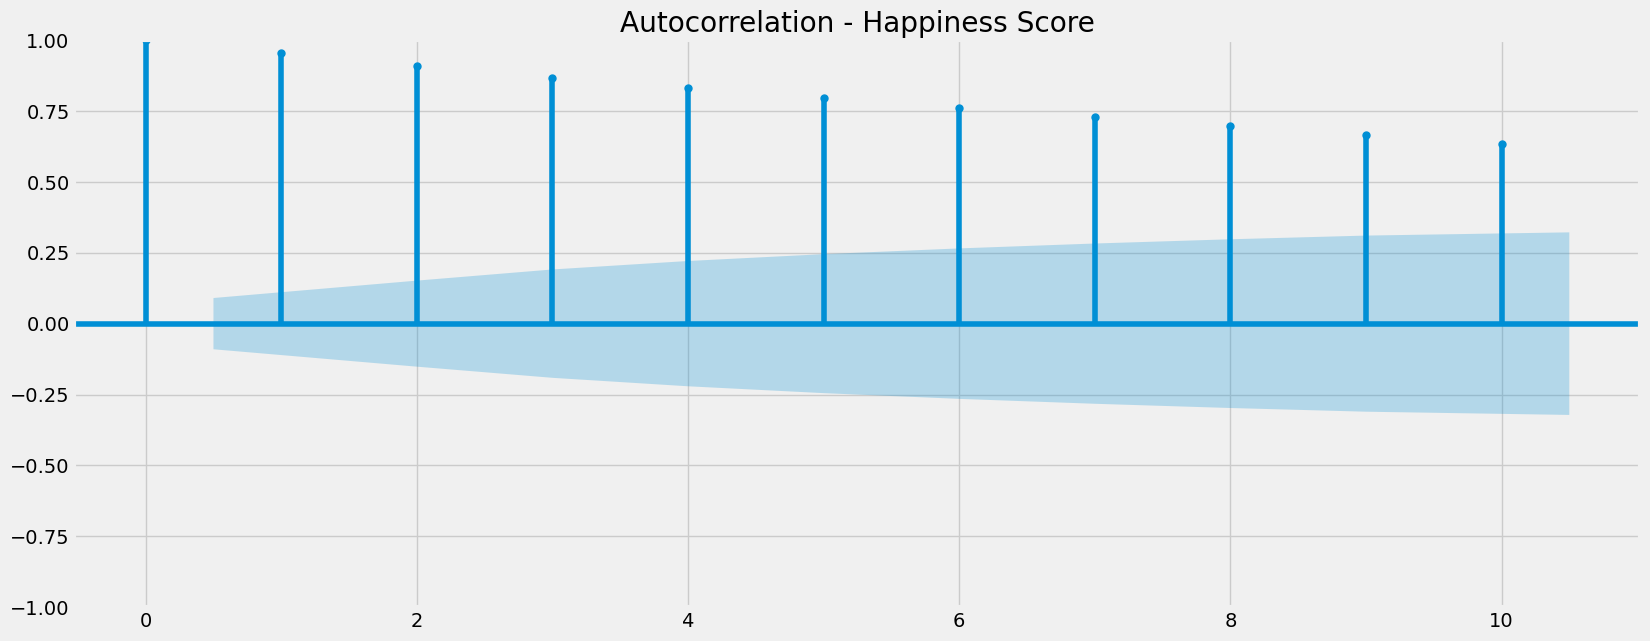

<Figure size 1000x400 with 0 Axes>

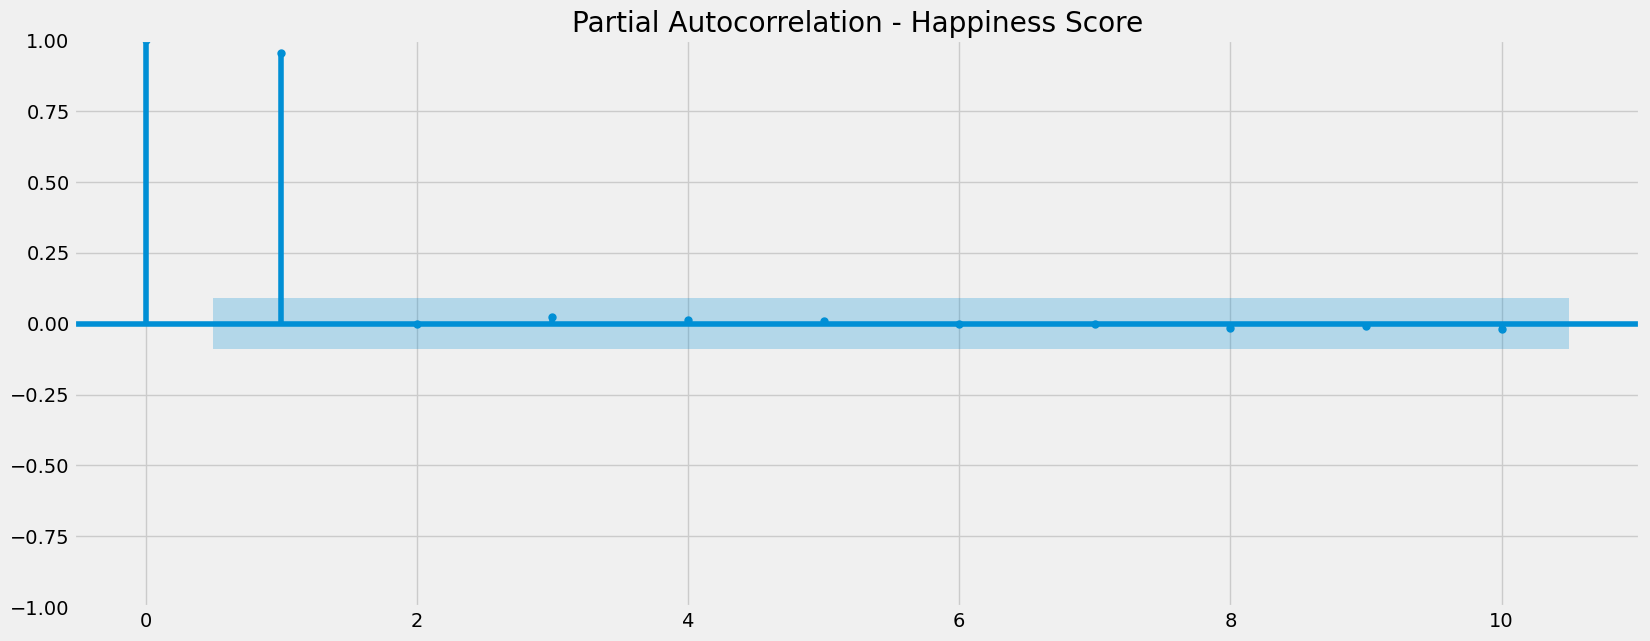

In [33]:
# import libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot Autocorrelation
plt.figure(figsize=(10,4))
plot_acf(whr_series, lags=10)  # adjust lags as needed
plt.title("Autocorrelation - Happiness Score")
plt.show()

# Plot PACF
plt.figure(figsize=(10,4))
plot_pacf(whr_series, lags=10)
plt.title("Partial Autocorrelation - Happiness Score")
plt.show()


In [34]:
# The data is non stationary. There is a trend over time and different factors (economic crisis, covid etc.) impact on Happiness Score over time. 

In [35]:
# (5) Stationarizing the World Happiness Data 

In [43]:
type(whr_clean)

pandas.core.frame.DataFrame

In [48]:
whr_clean["Happiness Score"] = pd.to_numeric(whr_clean["Happiness Score"], errors="coerce")
whr_series = whr_clean["Happiness Score"]

whr_diff = whr_clean - whr_clean.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [49]:
whr_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [50]:
whr_diff.head

<bound method NDFrame.head of 1     -0.026
2     -0.034
3     -0.005
4     -0.095
5     -0.021
       ...  
465   -0.024
466   -0.009
467   -0.113
468   -0.444
469   -0.212
Name: Happiness Score, Length: 469, dtype: float64>

In [51]:
whr_diff.columns

AttributeError: 'Series' object has no attribute 'columns'

In [52]:
type(whr_diff) # Check if I can use .columns since Series has not attribute columns.

pandas.core.series.Series

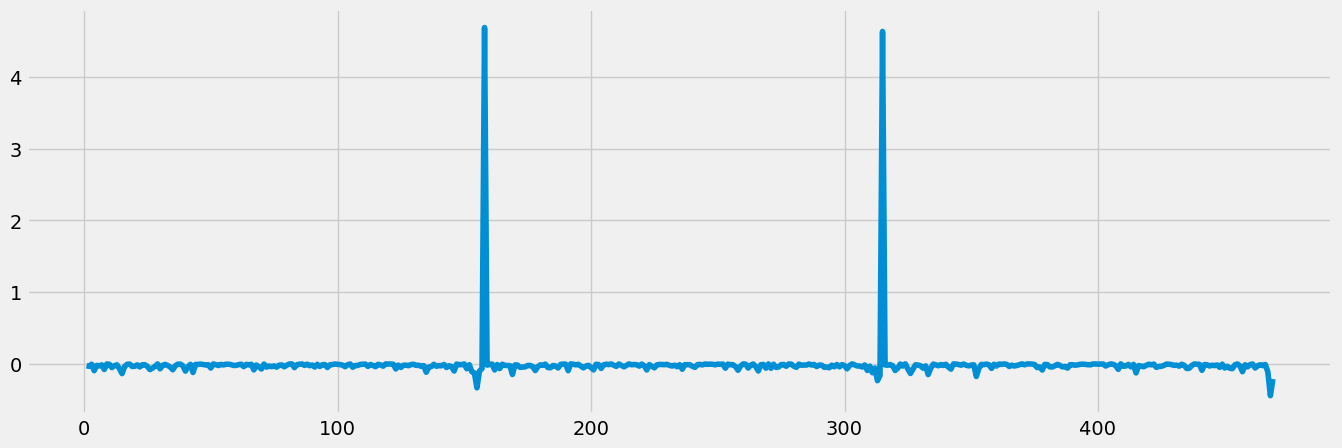

In [57]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(whr_diff)

In [61]:
dickey_fuller(whr_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -21.880855
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    468.000000
Critical Value (1%)             -3.444400
Critical Value (5%)             -2.867736
Critical Value (10%)            -2.570070
dtype: float64


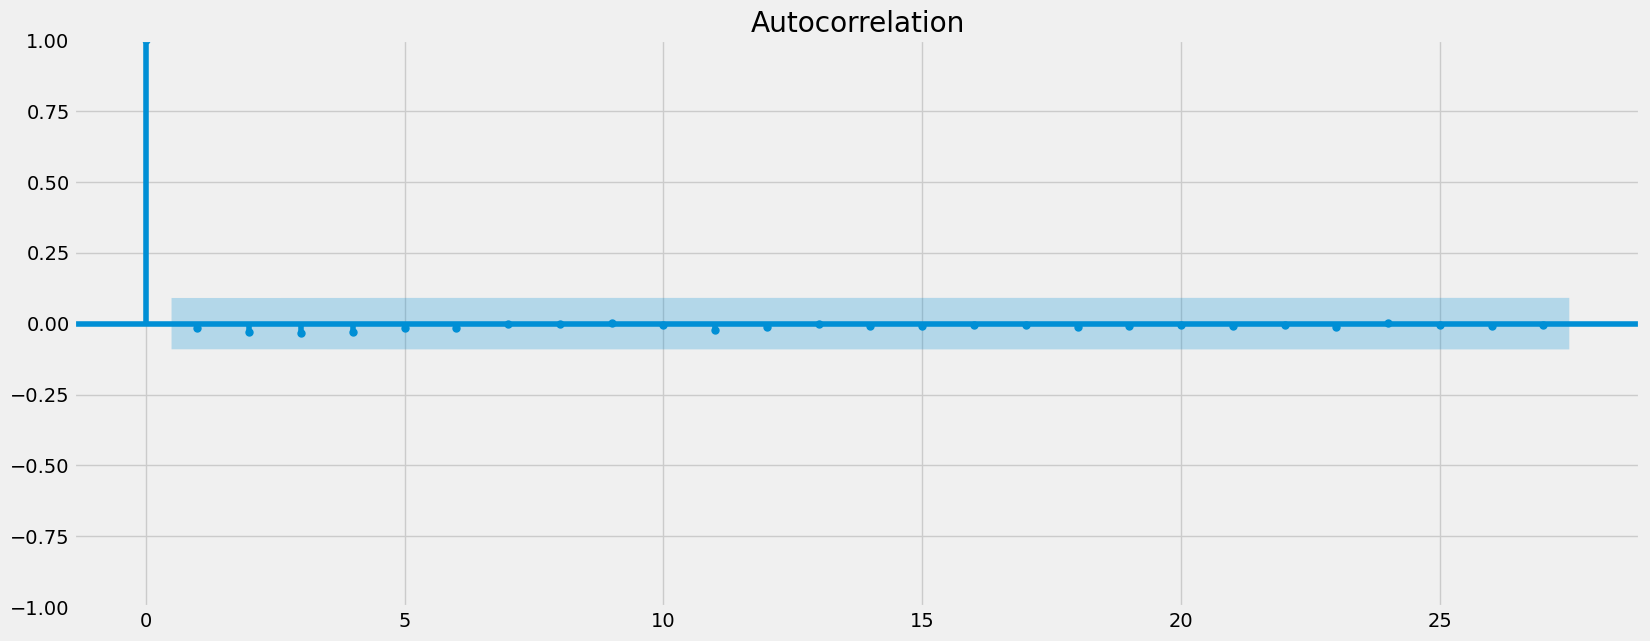

In [62]:
plot_acf(whr_diff)
plt.show()

In [63]:
# My comments: I find that time series analysis is not so relevant for the World Happiness data since it is collected once every year and the data is an average of the last 3 years. 
# There are no big fluctuations if looking at a shorter time period. The sample is also to small to decompose. It would have been better to choose another data set for this exercise, but I did not realize this upfront. 
# I could see a trend if analyzing more of the factors though. 

In [64]:
# Save DataFrame 'whr_diff' to CSV
whr_clean.to_csv(r'C:\Users\Administrator\Documents\data analytics\Advanced Analytics and Dashbord Design\World Happiness 2016-2024\02 Data\whr_clean.csv', index=False)